In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import itertools

In [20]:
data = pd.read_csv('data/Auto.csv', na_values='?').dropna()
mpg_median = data['mpg'].median()
data['mpg_high'] = [1 if x > mpg_median else 0 for x in data['mpg']]
X = data.drop(columns=['mpg', 'mpg_high', 'name'])
y = data['mpg_high']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [21]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

Train Accuracy: 0.9337
Test  Accuracy: 0.9031


In [22]:
for i in [0.01, 0.1, 1, 5, 10, 100]:
    print('C = ', i)
    svm = SVC(kernel='linear', C=i)
    score = cross_validate(svm, X, y, cv=10, scoring=['accuracy', 'roc_auc'], return_train_score=True)
    print('Train Accuracy: {:.4f}'.format(np.mean(score['train_accuracy'])))
    print('Test  Accuracy: {:.4f}\n'.format(np.mean(score['test_accuracy'])))

C =  0.01
Train Accuracy: 0.9192
Test  Accuracy: 0.9032

C =  0.1
Train Accuracy: 0.9189
Test  Accuracy: 0.9008

C =  1
Train Accuracy: 0.9053
Test  Accuracy: 0.8906

C =  5
Train Accuracy: 0.9067
Test  Accuracy: 0.8854

C =  10
Train Accuracy: 0.9050
Test  Accuracy: 0.8931

C =  100
Train Accuracy: 0.9062
Test  Accuracy: 0.8931



In [23]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'C': 0.01}

In [24]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 5, 10, 100, 500, 1000, 5000, 10000]}]
clf = GridSearchCV(SVC(kernel='poly', degree=2), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'C': 5000}

In [25]:
svm = SVC(kernel='poly', degree=2, C=5000)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

Train Accuracy: 0.9184
Test  Accuracy: 0.8878


In [26]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'C': 1, 'gamma': 0.001}

In [27]:
svm = SVC(kernel='rbf', C=1, gamma=0.001)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

Train Accuracy: 0.9796
Test  Accuracy: 0.8776


In [28]:
# We can see that no improve between non-linear compare to linear
# We use linear to plot chart

<Figure size 864x864 with 0 Axes>

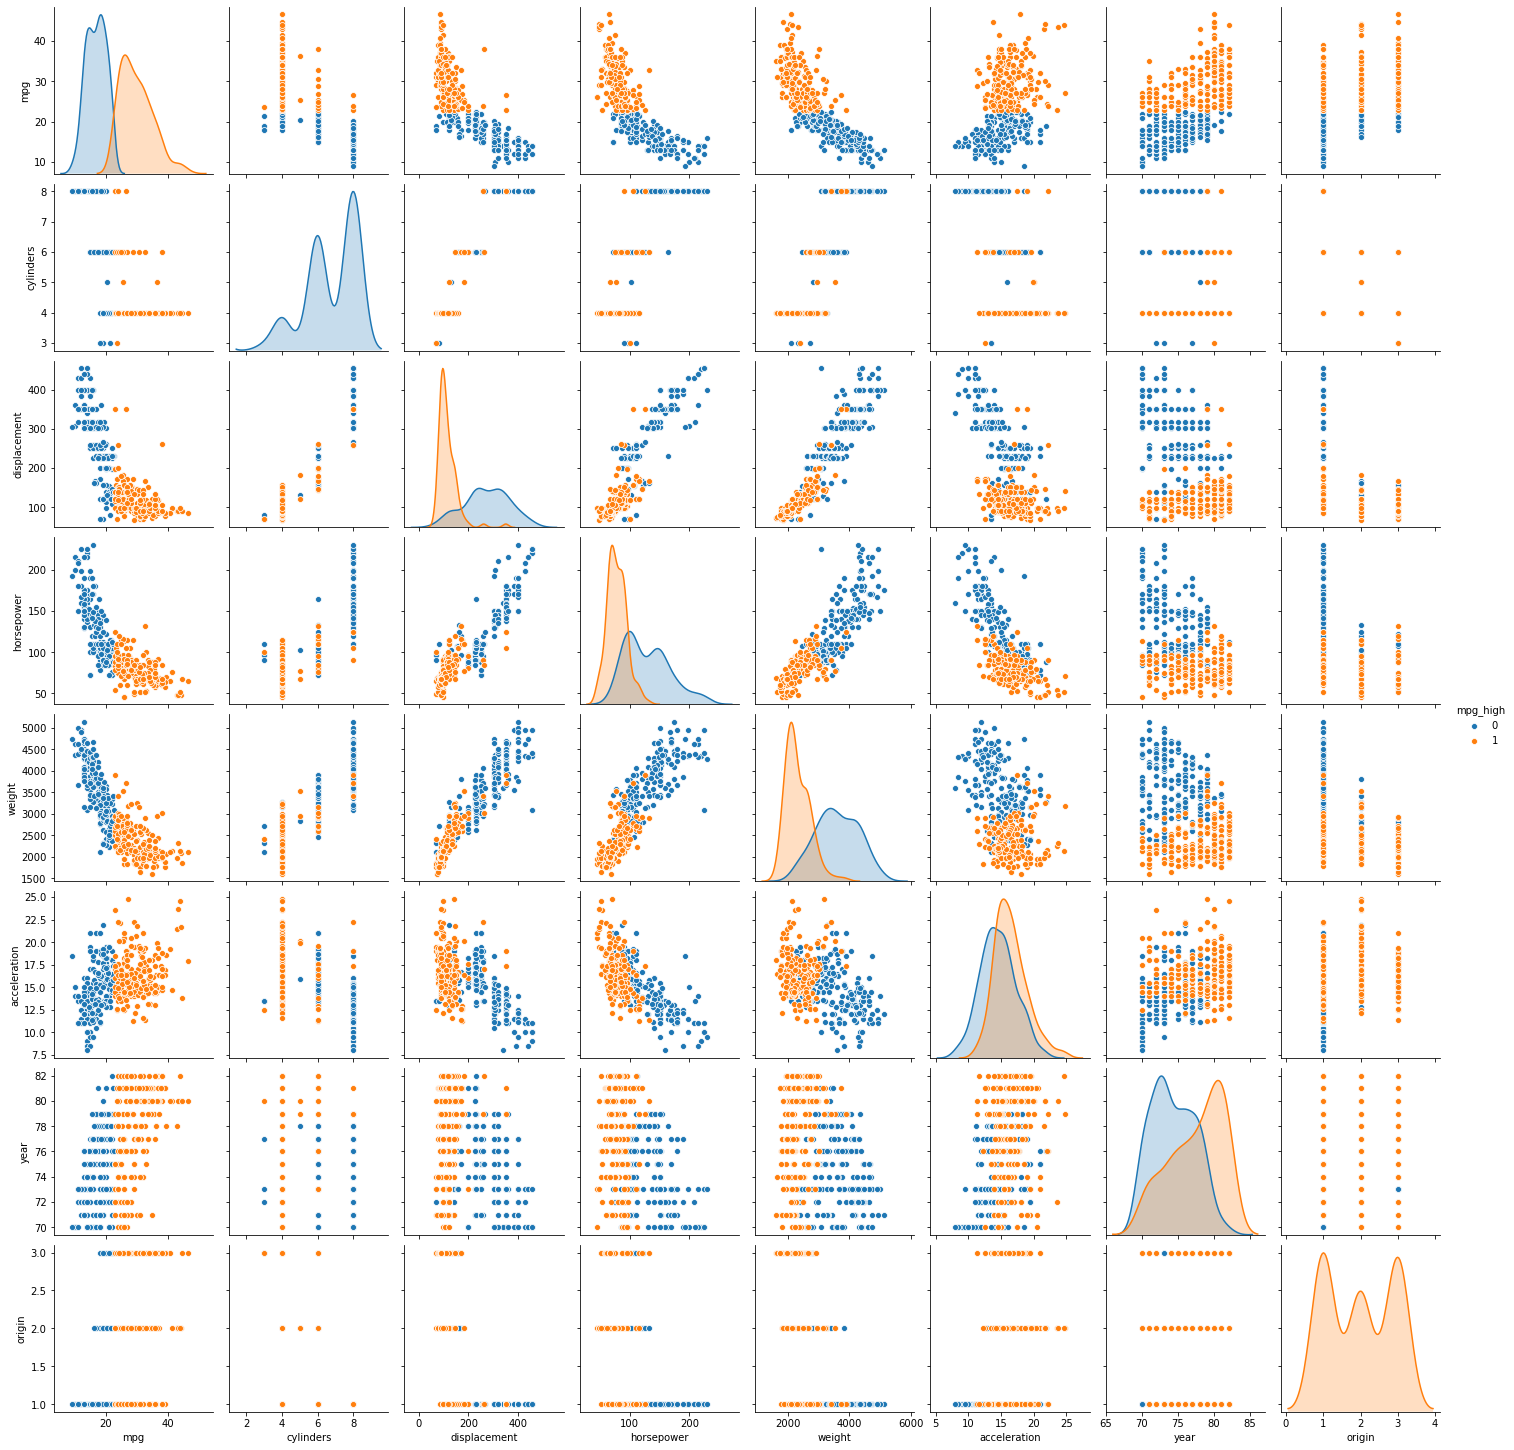

In [29]:
plt.figure(figsize=(12,12))
sb.pairplot(data=data, hue='mpg_high');

In [30]:
def plot_svc(svc, X1, X2, y, h=200, support_point=True):
    x_min, x_max = X1.min()*0.95, X1.max()*1.05
    y_min, y_max = X2.min()*0.95, X2.max()*1.05
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plt.figure(figsize=(8,6))
    sb.scatterplot(X1, X2, s=70, hue=y, palette="colorblind")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Support vectors indicated in plot by vertical lines
    if support_point==True:
        sv = svc.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=30, linewidths='0.1')
        # print('Number of support vectors: {}'.format(svc.support_.size))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    # plt.show()

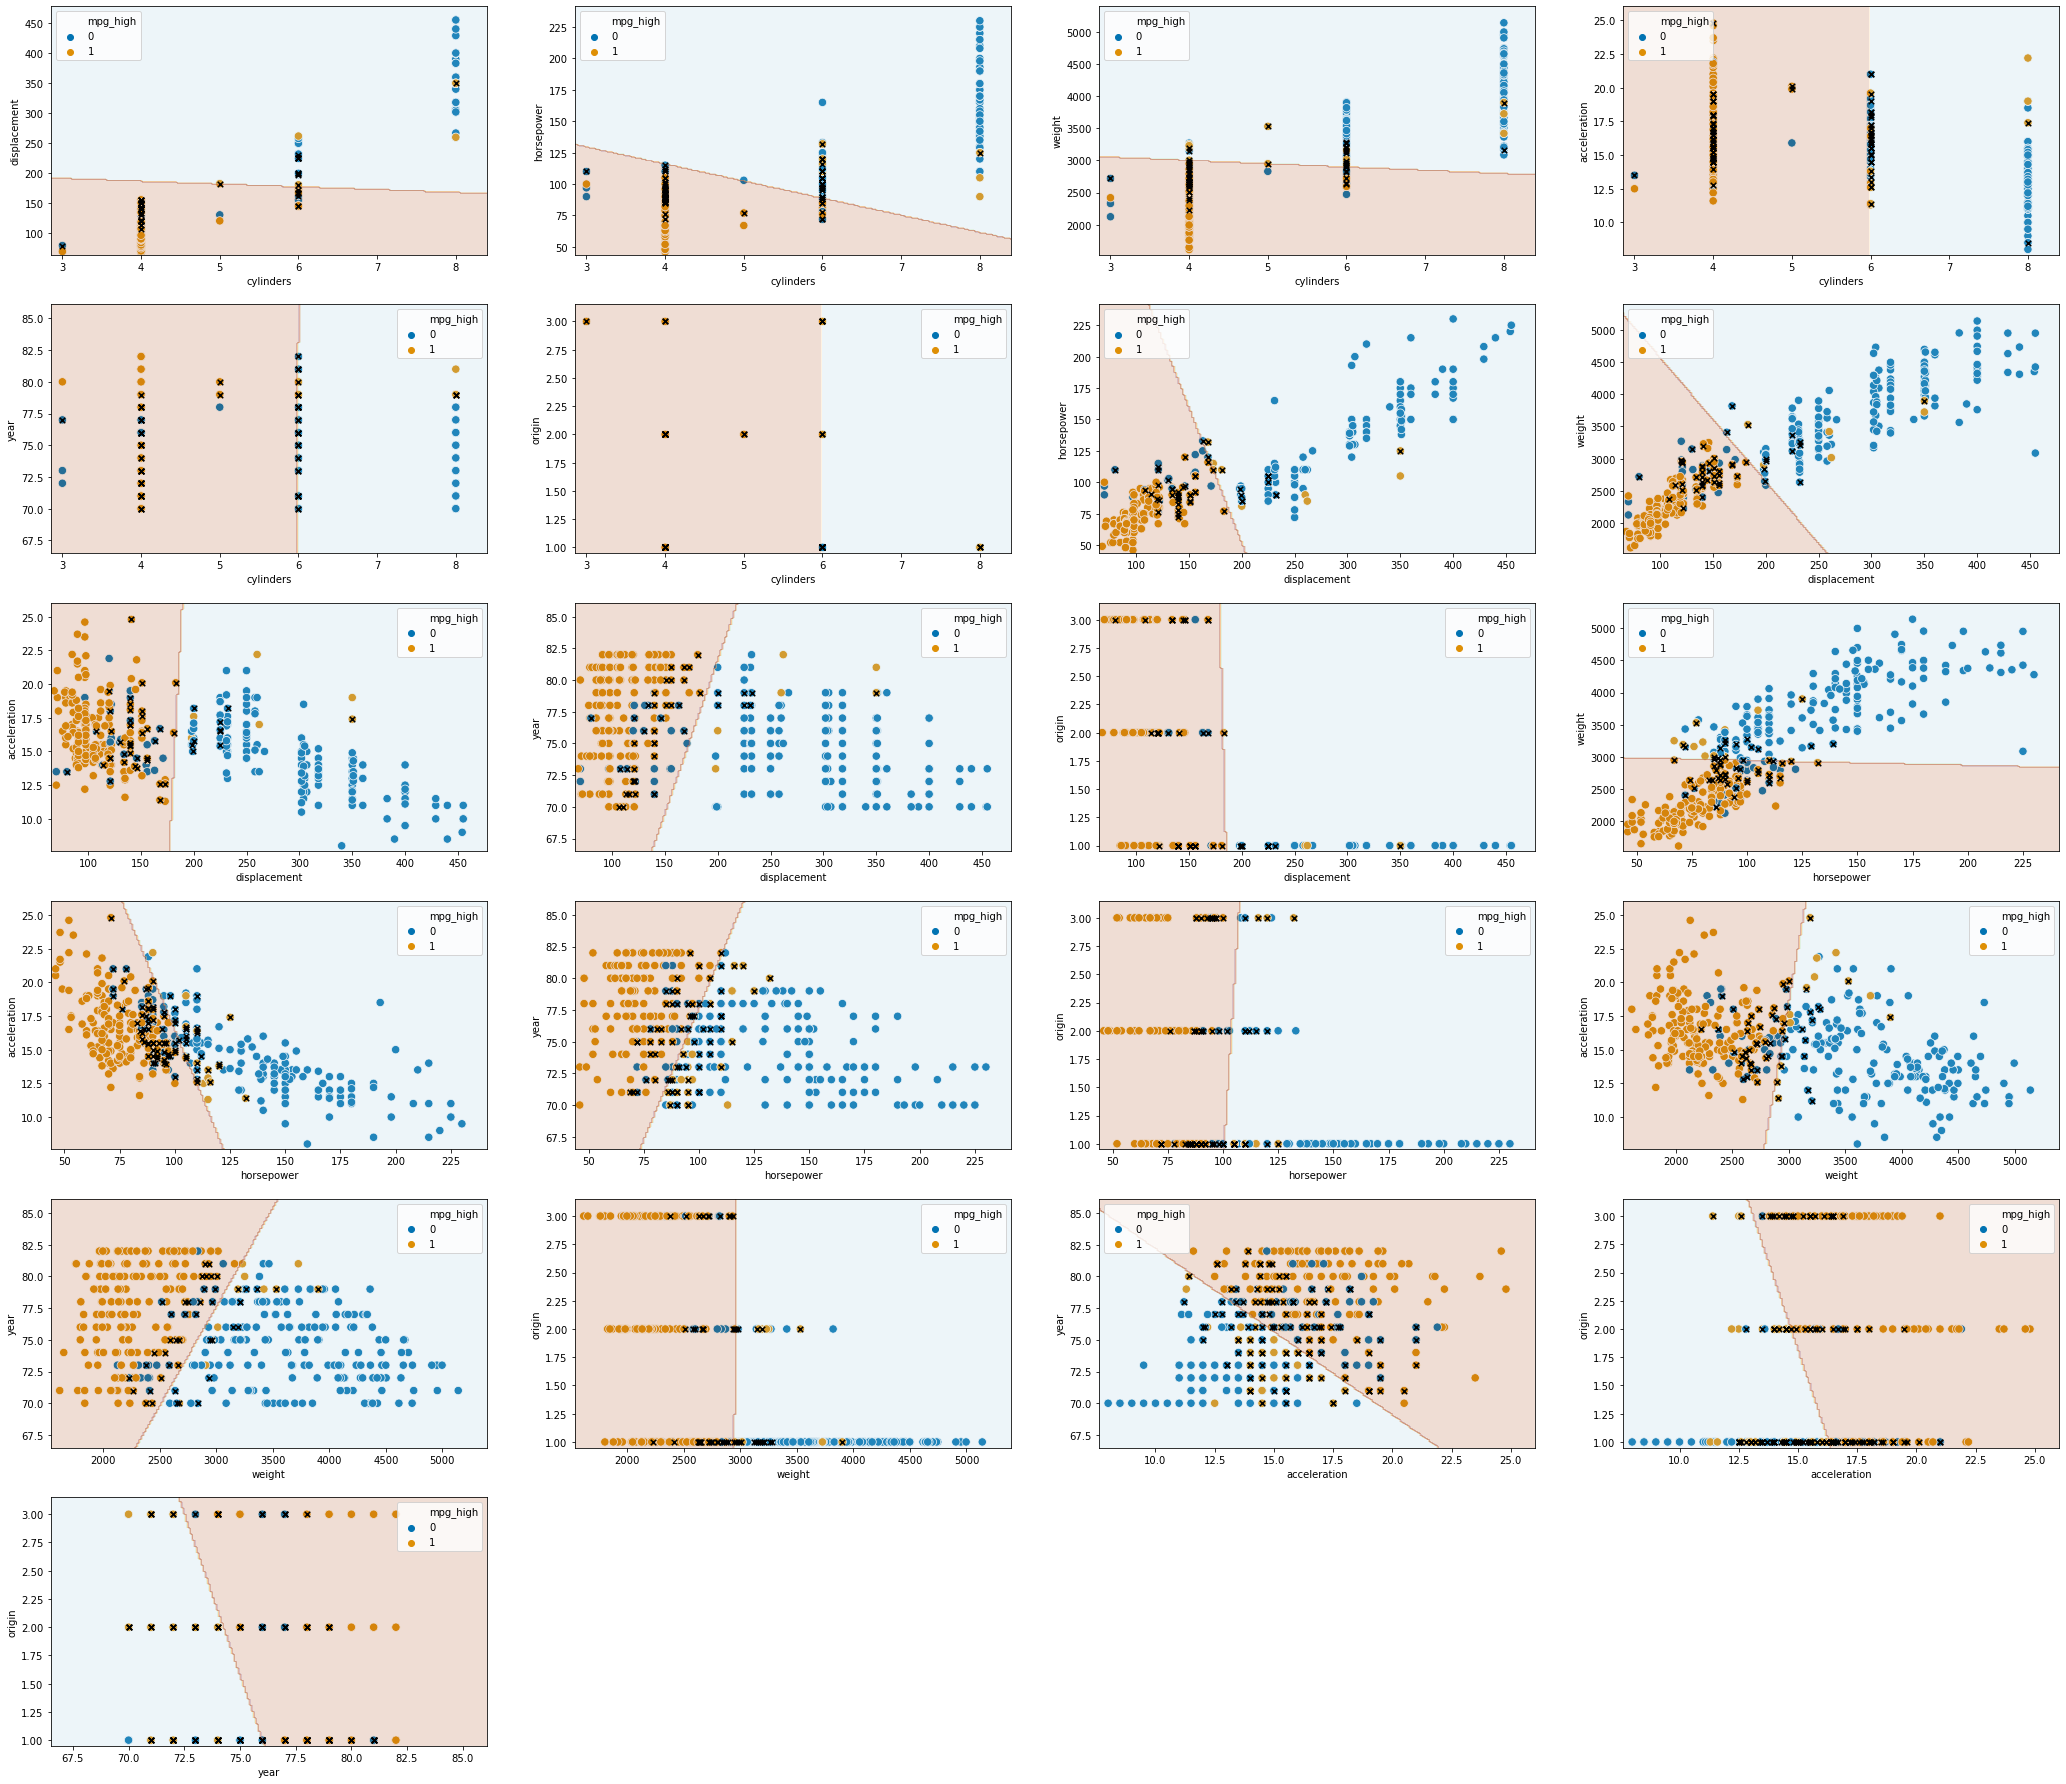

In [31]:
i = 0
svc = SVC(kernel='linear', C=0.01)
plt.figure(figsize=(36,32))
for x1, x2 in itertools.combinations(X.columns, 2):
    i = i + 1
    plt.subplot(6,4,i)
    feature = [x1, x2]
    svc.fit(X_train[feature], y_train)
    plot_svc(svc, X[str(x1)], X[str(x2)], y)